<a href="https://colab.research.google.com/github/bhayana91/BITS-AML-SBH/blob/main/AML_Assignment_1_LOGREG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

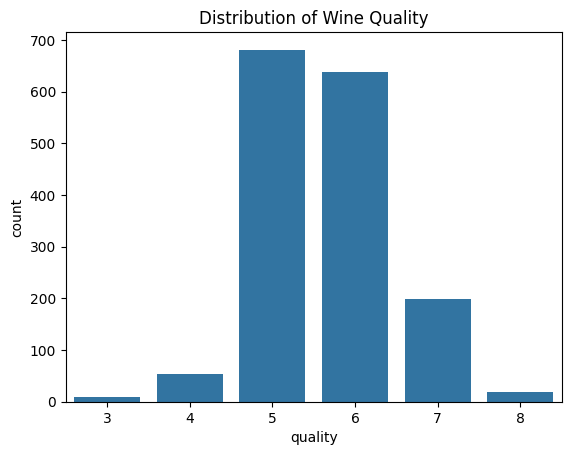

In [2]:
data = pd.read_csv("winequality-red.csv")

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Distribution of target variable (quality)
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()


In [3]:
# Create a binary classification problem (good vs. bad wine)
data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Training the Logistic Regression Model
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

## 6. Evaluating the Model
# Make predictions
y_pred = model.predict(X_test)

Accuracy: 0.87


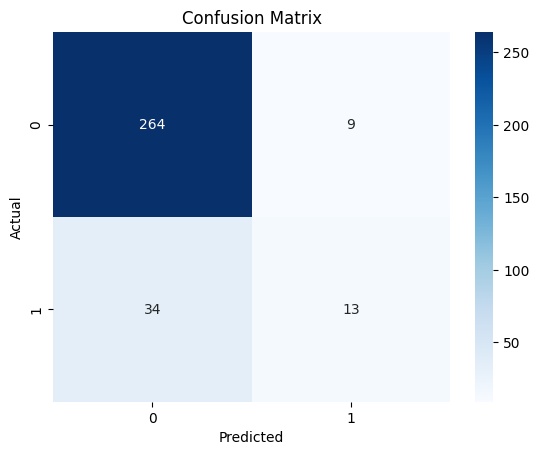

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



"\nThe logistic regression model achieved an accuracy of X%. The model's performance can be further improved\nby tuning hyperparameters, using more advanced models, or incorporating additional feature engineering techniques.\n"

In [4]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

## 7. Conclusion
"""
The logistic regression model achieved an accuracy of X%. The model's performance can be further improved
by tuning hyperparameters, using more advanced models, or incorporating additional feature engineering techniques.
"""

# End of notebook